In [1]:
# 1. Importar librerías necesarias
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import matplotlib.pyplot as plt


In [2]:
# 2. Cargar el dataset IMDb (top 10,000 palabras más frecuentes)
num_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

# 3. Padding para que todas las secuencias tengan la misma longitud
maxlen = 200
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)



17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# 4. Construir el modelo
model = Sequential([
    Embedding(input_dim=num_words, output_dim=128, input_length=maxlen),
    LSTM(64, return_sequences=False),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 5. Entrenar el modelo
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

# 6. Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {accuracy:.2f}")

Epoch 1/5


C:\Users\User\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 90ms/step - accuracy: 0.6817 - loss: 0.5797 - val_accuracy: 0.8508 - val_loss: 0.3562
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 90ms/step - accuracy: 0.8951 - loss: 0.2621 - val_accuracy: 0.8714 - val_loss: 0.3223
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - accuracy: 0.9327 - loss: 0.1808 - val_accuracy: 0.8728 - val_loss: 0.3181
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 91ms/step - accuracy: 0.9561 - loss: 0.1271 - val_accuracy: 0.8700 - val_loss: 0.3639
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - accuracy: 0.9718 - loss: 0.0864 - val_accuracy: 0.8574 - val_loss: 0.5337
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8448 - loss: 0.5697
Precisión en el conjunto de prueba: 0.84


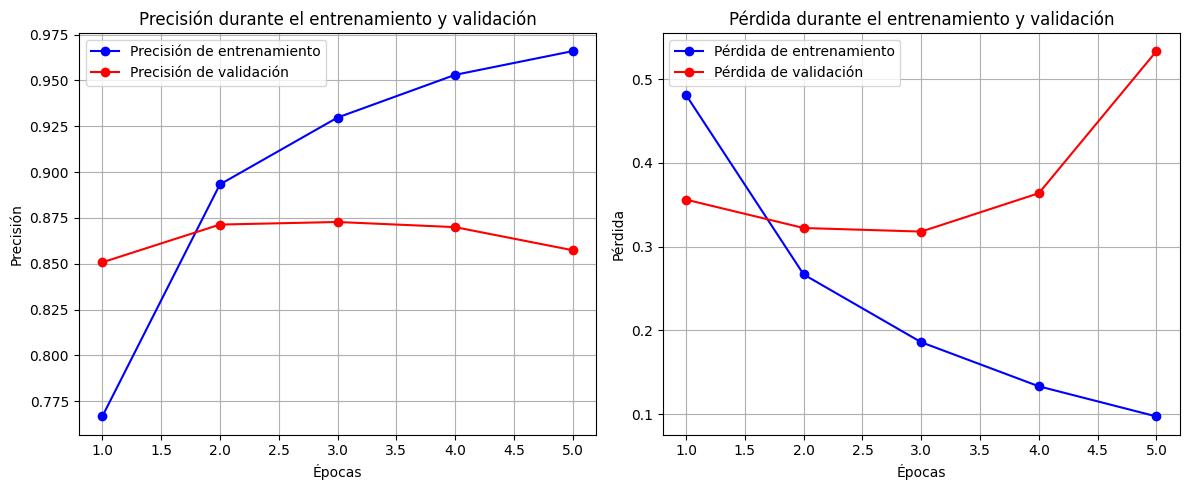

In [5]:
import matplotlib.pyplot as plt

# Función para graficar la evolución del entrenamiento
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    # Gráfica de precisión
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Precisión de entrenamiento')
    plt.plot(epochs, val_acc, 'ro-', label='Precisión de validación')
    plt.title('Precisión durante el entrenamiento y validación')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()
    plt.grid(True)

    # Gráfica de pérdida
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Pérdida de entrenamiento')
    plt.plot(epochs, val_loss, 'ro-', label='Pérdida de validación')
    plt.title('Pérdida durante el entrenamiento y validación')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Llamar a la función después de entrenar el modelo
plot_training_history(history)
